<a href="https://colab.research.google.com/github/AnusreeMandal/EDC_Website/blob/main/breast_cancer_detction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#description:this program detects brest cancer based on data

In [23]:
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
cancerData = datasets.load_breast_cancer()

In [8]:
X = pd.DataFrame(data = cancerData.data, columns=cancerData.feature_names )
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
y = cancerData.target


In [11]:
X.shape


(569, 30)

In [12]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,stratify=y)

In [13]:
X_train.shape

(512, 30)

In [14]:
y_test.shape

(57,)

In [ ]:
#applying the standard model

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train = X_train.reshape(512,30,1)
X_test = X_test.reshape(57,30,1)

In [24]:
model = Sequential()
model.add(Conv1D(filters=16,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 16)            48        
                                                                 
 batch_normalization (Batch  (None, 29, 16)            64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 29, 16)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 32)            1056      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 28, 32)            0

In [26]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history = model.fit(X_train,y_train,epochs=35,verbose=1,validation_data=(X_test,y_test))

Epoch 1/35
16/16 [==============================] - 2s 30ms/step - loss: 0.8745 - accuracy: 0.5098 - val_loss: 0.6728 - val_accuracy: 0.5789
Epoch 2/35
16/16 [==============================] - 0s 9ms/step - loss: 0.5155 - accuracy: 0.7402 - val_loss: 0.6144 - val_accuracy: 0.7895
Epoch 3/35
16/16 [==============================] - 0s 9ms/step - loss: 0.3905 - accuracy: 0.8340 - val_loss: 0.5560 - val_accuracy: 0.8596
Epoch 4/35
16/16 [==============================] - 0s 9ms/step - loss: 0.3164 - accuracy: 0.8613 - val_loss: 0.5019 - val_accuracy: 0.8947
Epoch 5/35
16/16 [==============================] - 0s 8ms/step - loss: 0.2627 - accuracy: 0.9004 - val_loss: 0.4529 - val_accuracy: 0.9298
Epoch 6/35
16/16 [==============================] - 0s 8ms/step - loss: 0.2374 - accuracy: 0.9180 - val_loss: 0.4090 - val_accuracy: 0.9298
Epoch 7/35
16/16 [==============================] - 0s 9ms/step - loss: 0.2193 - accuracy: 0.9238 - val_loss: 0.3671 - val_accuracy: 0.9474
Epoch 8/35
16/16 [=

In [ ]:
#plots of accuracy

In [28]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

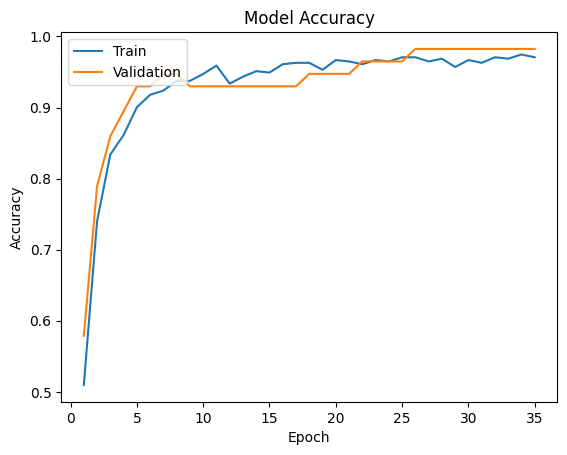

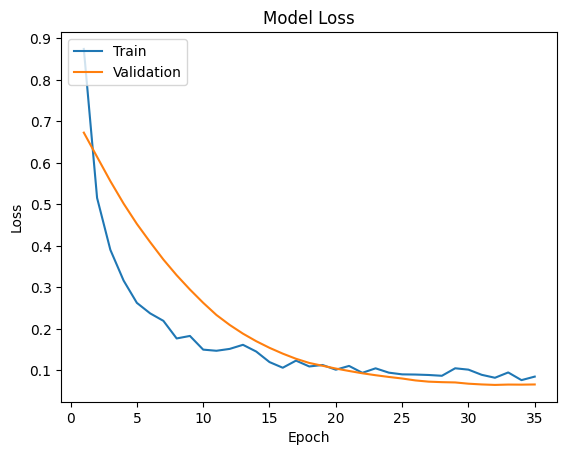

In [29]:
plotLearningCurve(history,35)